# Moving Beyond Linear Models

### Polynomial Regression
Add additional predictors that are the original predictors raised to a power, ie X, X^2, X^3

### Step Functions
Cut the range of a variable into K distinct regions to produce a qualitative variable.  Fits like a piecewise constant function.

### Regression Splines
Similar to Step Function & Poly Regression, divide range of X into distinct regions and fit each region using a polynomial function.  But, they are constrained so they join smoothly to each region boundary (aka knot)

### Smoothing Splines
Similar to regression splines, but result from minimizing RSS with a smoothness penalty.

### Local Regression
Similar to splines, but regions can overlap, in a smooth way

### Generalized Additive Model
Extend above methods to work with multiple predictors





### 6.


In [5]:
require(ISLR)
require(boot)
attach(Wage)

The following objects are masked from Wage (pos = 3):

    age, education, health, health_ins, jobclass, logwage, maritl,
    race, region, wage, year

The following objects are masked from Wage (pos = 4):

    age, education, health, health_ins, jobclass, logwage, maritl,
    race, region, wage, year



[1] 1675.837 1601.012 1598.801 1594.217 1594.625 1594.888 1595.500 1595.436
 [9] 1596.335 1595.835

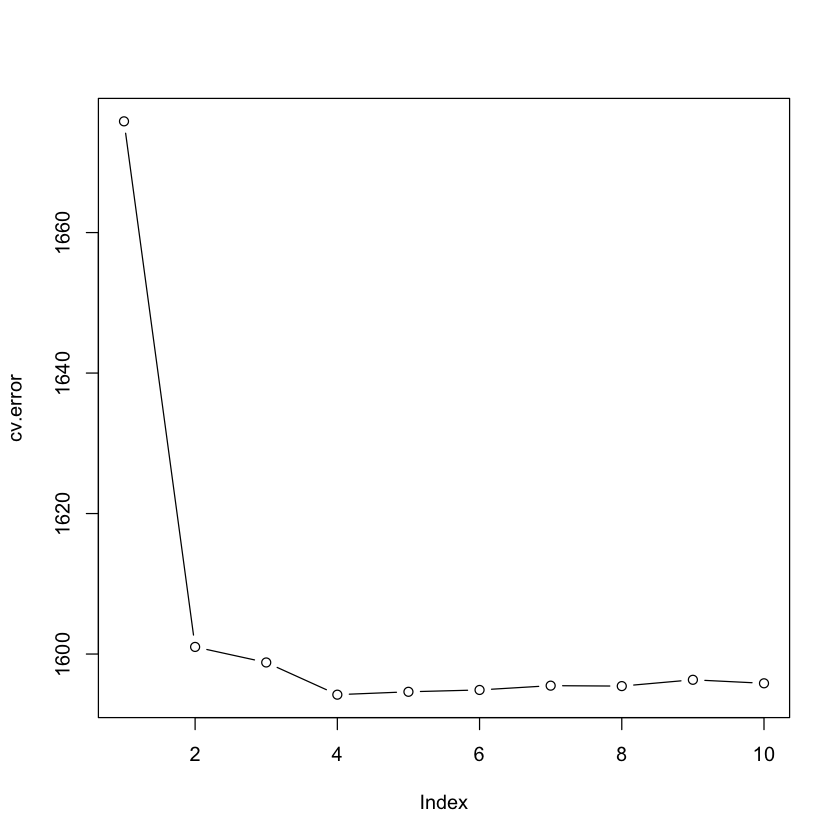

In [18]:
set.seed(1)
cv.error <- rep(0,10)
for (i in 1:10) {
    glm.fit <- glm(wage~poly(age,i), data=Wage)
    cv.error[i] <- cv.glm(Wage, glm.fit, K=10)$delta[1]  # [1]:std, [2]:bias-corrected
}
cv.error

plot(cv.error, type="b")

In [27]:
set.seed(1)
cv.fits <- c()

cv.fit <- lm(wage~poly(age,1), data=Wage)
??cv.fit

for (i in 1:10) {
    cv.fits[i] <- lm(wage~poly(age,i), data=Wage)
#    cv.error[i] <- cv.glm(Wage, glm.fit, K=10)$delta[1]  # [1]:std, [2]:bias-corrected
}
anova(cv.fits)


No vignettes or demos or help files found with alias or concept or
title matching ‘cv.fit’ using regular expression matching.

Warning message in cv.fits[i] <- lm(wage ~ poly(age, i), data = Wage):
“number of items to replace is not a multiple of replacement length”Warning message in cv.fits[i] <- lm(wage ~ poly(age, i), data = Wage):
“number of items to replace is not a multiple of replacement length”Warning message in cv.fits[i] <- lm(wage ~ poly(age, i), data = Wage):
“number of items to replace is not a multiple of replacement length”Warning message in cv.fits[i] <- lm(wage ~ poly(age, i), data = Wage):
“number of items to replace is not a multiple of replacement length”Warning message in cv.fits[i] <- lm(wage ~ poly(age, i), data = Wage):
“number of items to replace is not a multiple of replacement length”Warning message in cv.fits[i] <- lm(wage ~ poly(age, i), data = Wage):
“number of items to replace is not a multiple of replacement length”Warning message in cv.fits[i] <- lm(wage ~ poly(age, i), data = Wage):
“number of items to replace is not a multiple of replacement length”Warning message in cv.fits[

ERROR: Error in UseMethod("anova"): no applicable method for 'anova' applied to an object of class "list"


In [9]:
library(splines)
glm.fit <- glm(wage~bs(age,knots=c(25,40,60)), data=Wage)
cv.glm(Wage, glm.fit, K=10)$delta[1]
?bs

[1] 1596.477